In [1469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [1470]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1471]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [1472]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605526 entries, 0 to 1605525
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1605526 non-null  int64  
 1   kWh       1605526 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.5 MB


In [1473]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1605521    0.13
1605522    0.12
1605523    0.12
1605524    0.12
1605525    0.12
Name: kWh, Length: 1605526, dtype: float64

In [1474]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1605521    0.13
1605522    0.12
1605523    0.12
1605524    0.12
1605525    0.12
Name: kWh, Length: 1605526, dtype: float64

In [1475]:
l=len(conso_data)-1
l

1605525

In [1476]:
conso_data['sec']=conso_data['Interval']/1000


In [1477]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1478]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1479]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605526 entries, 0 to 1605525
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1605526 non-null  int64  
 1   kWh        1605526 non-null  float64
 2   sec        1605526 non-null  float64
 3   Wh         1605526 non-null  float64
 4   cumul(ms)  1605526 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 61.2 MB


In [1480]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1605521,28482,0.13,28.482,126.395618,39712284242
1605522,29041,0.12,29.041,123.962673,39712313283
1605523,28935,0.12,28.935,124.416796,39712342218
1605524,28737,0.12,28.737,125.274037,39712370955
1605525,28861,0.12,28.861,124.735803,39712399816


In [1481]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

39712399816000

In [1482]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 4, 28, 183155)

In [1483]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1484]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [1485]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [1486]:
conso_data['dates']

0         2023-08-21 19:04:50.117155
1         2023-08-21 19:05:11.975155
2         2023-08-21 19:05:33.976155
3         2023-08-21 19:05:55.904155
4         2023-08-21 19:06:17.795155
                     ...            
1605521   2024-11-23 10:15:52.425155
1605522   2024-11-23 10:16:21.466155
1605523   2024-11-23 10:16:50.401155
1605524   2024-11-23 10:17:19.138155
1605525   2024-11-23 10:17:47.999155
Name: dates, Length: 1605526, dtype: datetime64[ns]

## créer les dates

In [1487]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:50.117155,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:11.975155,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:33.976155,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:05:55.904155,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:17.795155,21/08/23
...,...,...,...,...,...,...,...
1605521,28482,0.13,28.482,126.395618,39712284242,2024-11-23 10:15:52.425155,23/11/24
1605522,29041,0.12,29.041,123.962673,39712313283,2024-11-23 10:16:21.466155,23/11/24
1605523,28935,0.12,28.935,124.416796,39712342218,2024-11-23 10:16:50.401155,23/11/24
1605524,28737,0.12,28.737,125.274037,39712370955,2024-11-23 10:17:19.138155,23/11/24


### save conso_data with dates

In [1488]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [1489]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('23/11/24', 23, 11, 2024)

In [1490]:
here = now.strftime('%H:%M:%S')
here

'10:18:27'

In [1491]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1492]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1604268 to 1605525
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1258 non-null   int64         
 1   kWh        1258 non-null   float64       
 2   sec        1258 non-null   float64       
 3   Wh         1258 non-null   float64       
 4   cumul(ms)  1258 non-null   int64         
 5   dates      1258 non-null   datetime64[ns]
 6   days       1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 78.6+ KB


In [1493]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [1494]:
data = list(df_grp['kWh'])
print(data)

[0.836, 3.701, 4.231, 3.682, 4.19, 4.61, 3.521, 3.407, 3.515, 3.697, 3.774, 3.785, 4.258, 3.809, 3.459, 3.64, 3.324, 3.374, 4.294, 4.003, 4.046, 3.922, 3.442, 4.459, 3.74, 3.761, 4.379, 4.677, 3.797, 3.222, 3.18, 4.004, 3.668, 3.17, 3.793, 4.152, 3.753, 3.57, 4.783, 4.185, 4.545, 3.773, 3.405, 4.308, 3.874, 3.867, 3.434, 4.081, 3.655, 3.399, 4.135, 3.381, 3.889, 3.838, 3.64, 3.75, 4.244, 3.304, 3.869, 2.978, 2.055, 2.041, 2.457, 4.089, 3.724, 4.33, 3.619, 3.916, 3.743, 3.927, 3.98, 4.116, 3.642, 3.16, 3.803, 3.51, 3.625, 3.709, 3.685, 3.237, 3.906, 3.218, 3.789, 3.605, 4.084, 3.607, 3.344, 3.819, 4.062, 4.385, 4.08, 3.998, 4.229, 3.749, 3.923, 3.865, 3.914, 3.744, 4.043, 4.345, 3.889, 3.502, 3.682, 3.675, 3.342, 3.847, 3.994, 4.104, 3.473, 4.176, 3.607, 4.083, 4.526, 3.685, 3.428, 3.579, 4.169, 3.69, 4.082, 3.981, 3.745, 3.591, 5.129, 3.698, 3.766, 4.295, 4.099, 4.724, 4.397, 3.978, 3.784, 4.361, 4.679, 4.201, 4.787, 4.321, 3.717, 4.185, 3.707, 3.631, 3.528, 3.95, 3.67, 3.787, 3.576, 3

In [1495]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1496]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1497]:
df = conso_data
len(df)

1605526

In [1498]:
period(p=2)

2023-08-22 01:11:03.920155	2023-08-22 08:15:19.540155	7h 4m 15s 	2000


In [1499]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.292502
dtype: float64

In [1500]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.482703
dtype: float64

In [1501]:
last=df_grp.iloc[-1]['kWh']
last

1.258

In [1502]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1604268 to 1605525
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1258 non-null   int64         
 1   kWh        1258 non-null   float64       
 2   sec        1258 non-null   float64       
 3   Wh         1258 non-null   float64       
 4   cumul(ms)  1258 non-null   int64         
 5   dates      1258 non-null   datetime64[ns]
 6   days       1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 78.6+ KB


In [1503]:
# select day
day = today
#day = '16/08/24'


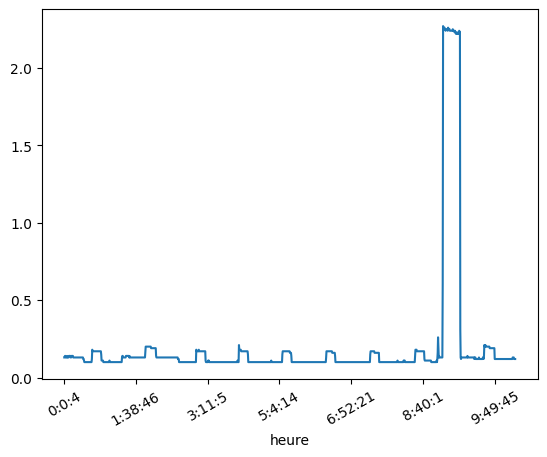

In [1504]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [1505]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:50.117155,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:11.975155,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:33.976155,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:05:55.904155,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:17.795155,21/08/23
...,...,...,...,...,...,...,...
1605521,28482,0.13,28.482,126.395618,39712284242,2024-11-23 10:15:52.425155,23/11/24
1605522,29041,0.12,29.041,123.962673,39712313283,2024-11-23 10:16:21.466155,23/11/24
1605523,28935,0.12,28.935,124.416796,39712342218,2024-11-23 10:16:50.401155,23/11/24
1605524,28737,0.12,28.737,125.274037,39712370955,2024-11-23 10:17:19.138155,23/11/24


In [1506]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:4,27514,0.13,27.514,130.842480,39675336269,2024-11-23 00:00:04.452155,23/11/24
0:0:31,26896,0.13,26.896,133.848899,39675363165,2024-11-23 00:00:31.348155,23/11/24
0:0:56,25648,0.14,25.648,140.361822,39675388813,2024-11-23 00:00:56.996155,23/11/24
0:1:23,26054,0.14,26.054,138.174561,39675414867,2024-11-23 00:01:23.050155,23/11/24
0:1:49,26790,0.13,26.790,134.378499,39675441657,2024-11-23 00:01:49.840155,23/11/24
...,...,...,...,...,...,...,...
10:15:52,28482,0.13,28.482,126.395618,39712284242,2024-11-23 10:15:52.425155,23/11/24
10:16:21,29041,0.12,29.041,123.962673,39712313283,2024-11-23 10:16:21.466155,23/11/24
10:16:50,28935,0.12,28.935,124.416796,39712342218,2024-11-23 10:16:50.401155,23/11/24


In [1507]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.572
Min : 26/10/24 3.138


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1604268,27514,0.13,27.514,130.842480,39675336269,2024-11-23 00:00:04.452155,23/11/24,0:0:4
1604269,26896,0.13,26.896,133.848899,39675363165,2024-11-23 00:00:31.348155,23/11/24,0:0:31
1604270,25648,0.14,25.648,140.361822,39675388813,2024-11-23 00:00:56.996155,23/11/24,0:0:56
1604271,26054,0.14,26.054,138.174561,39675414867,2024-11-23 00:01:23.050155,23/11/24,0:1:23
1604272,26790,0.13,26.790,134.378499,39675441657,2024-11-23 00:01:49.840155,23/11/24,0:1:49
...,...,...,...,...,...,...,...,...
1605521,28482,0.13,28.482,126.395618,39712284242,2024-11-23 10:15:52.425155,23/11/24,10:15:52
1605522,29041,0.12,29.041,123.962673,39712313283,2024-11-23 10:16:21.466155,23/11/24,10:16:21
1605523,28935,0.12,28.935,124.416796,39712342218,2024-11-23 10:16:50.401155,23/11/24,10:16:50
1605524,28737,0.12,28.737,125.274037,39712370955,2024-11-23 10:17:19.138155,23/11/24,10:17:19


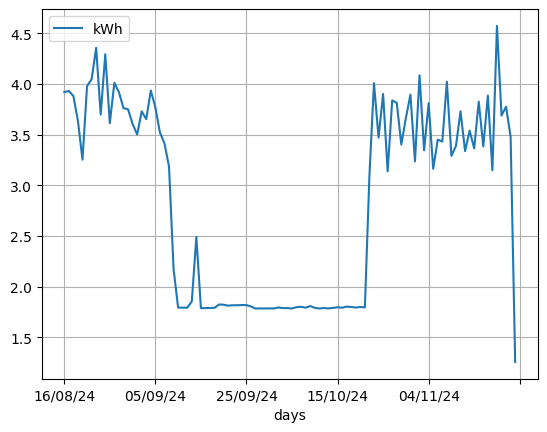

In [1508]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-23 00:00:04.452155	2024-11-23 08:39:39.790155	8h 39m 35s 	1000
2024-11-23 08:39:39.790155	2024-11-23 10:17:47.999155	1h 38m 8s 	258
<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 1604268 to 1605525
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1258 non-null   int64         
 1   kWh        1258 non-null   float64       
 2   sec        1258 non-null   float64       
 3   Wh         1258 non-null   float64       
 4   cumul(ms)  1258 non-null   int64         
 5   dates      1258 non-null   datetime64[ns]
 6   days       1258 non-null   object        
 7   heure      1258 non-null   object        
 8   hours      1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 98.3+ KB


('23/11/24', <Axes: xlabel='hours'>)

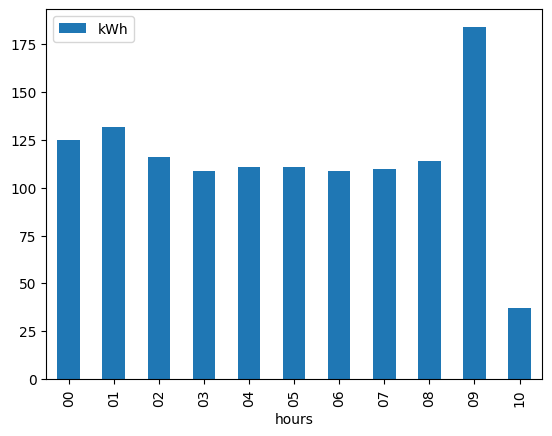

In [1509]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [1510]:
df_grp

,kWh
days,
21/08/23,0.836
22/08/23,3.701
23/08/23,4.231
24/08/23,3.682
25/08/23,4.190
...,...
19/11/24,4.572
20/11/24,3.688
21/11/24,3.776


In [1511]:
# select number of days to display
span = 30
#df_grp.tail(span)


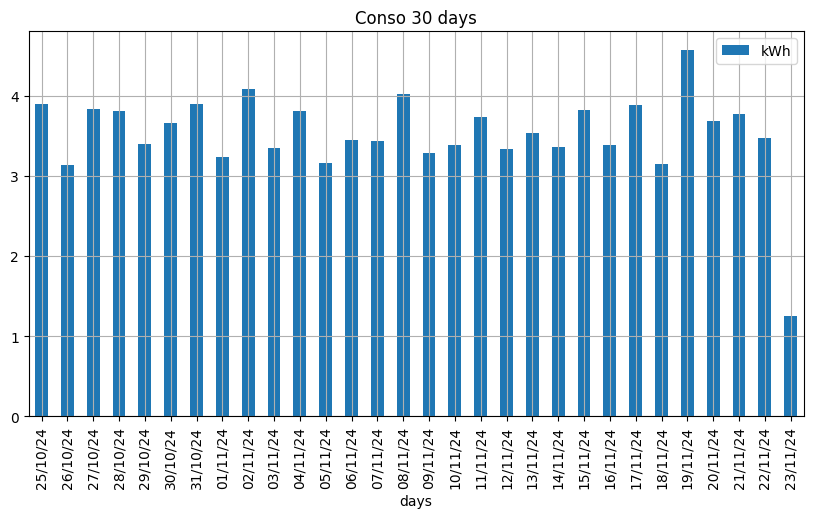

In [1512]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


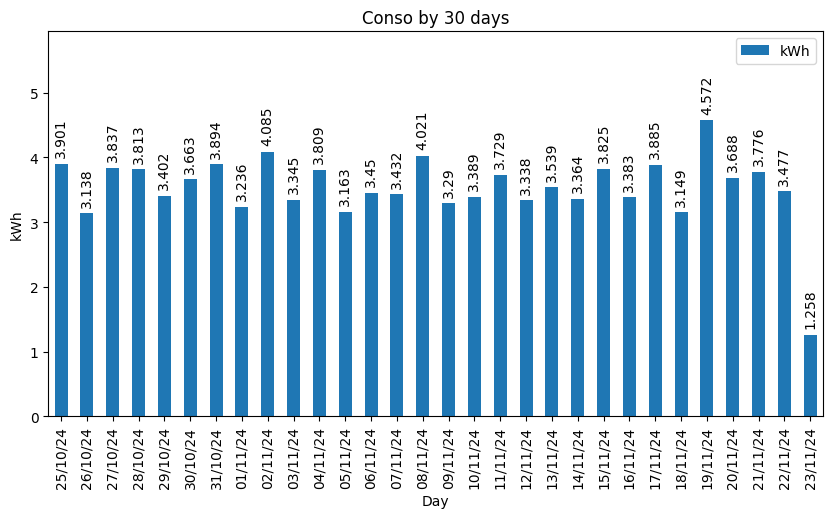

In [1513]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [1514]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
25/10/24    3.901
26/10/24    3.138
27/10/24    3.837
28/10/24    3.813
29/10/24    3.402
30/10/24    3.663
31/10/24    3.894
01/11/24    3.236
02/11/24    4.085
03/11/24    3.345
04/11/24    3.809
05/11/24    3.163
06/11/24    3.450
07/11/24    3.432
08/11/24    4.021
09/11/24    3.290
10/11/24    3.389
11/11/24    3.729
12/11/24    3.338
13/11/24    3.539
14/11/24    3.364
15/11/24    3.825
16/11/24    3.383
17/11/24    3.885
18/11/24    3.149
19/11/24    4.572
20/11/24    3.688
21/11/24    3.776
22/11/24    3.477
23/11/24    1.258
Name: kWh, dtype: float64

In [1515]:
x_labels=df_grp.tail(span).index
x_labels

Index(['25/10/24', '26/10/24', '27/10/24', '28/10/24', '29/10/24', '30/10/24',
       '31/10/24', '01/11/24', '02/11/24', '03/11/24', '04/11/24', '05/11/24',
       '06/11/24', '07/11/24', '08/11/24', '09/11/24', '10/11/24', '11/11/24',
       '12/11/24', '13/11/24', '14/11/24', '15/11/24', '16/11/24', '17/11/24',
       '18/11/24', '19/11/24', '20/11/24', '21/11/24', '22/11/24', '23/11/24'],
      dtype='object', name='days')

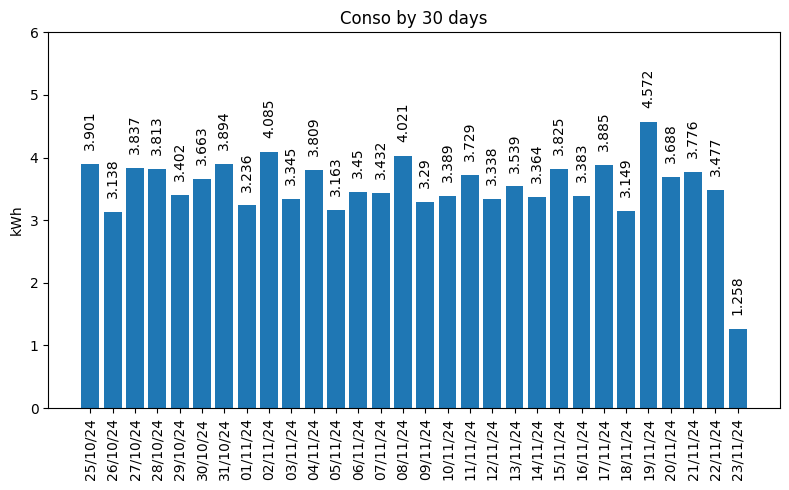

In [1516]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [1517]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

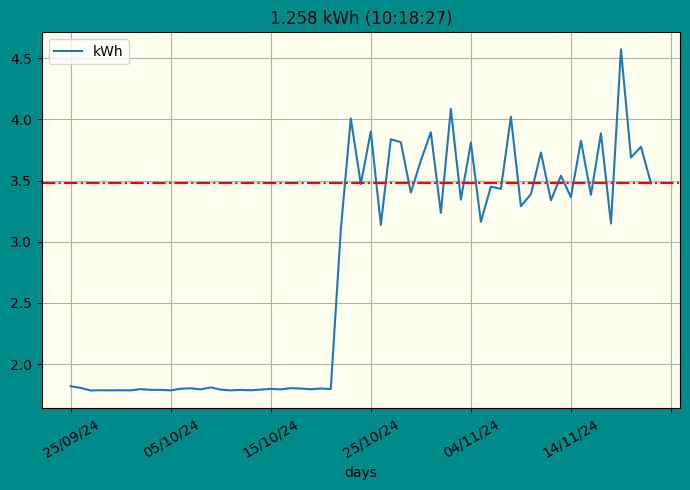

In [1518]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

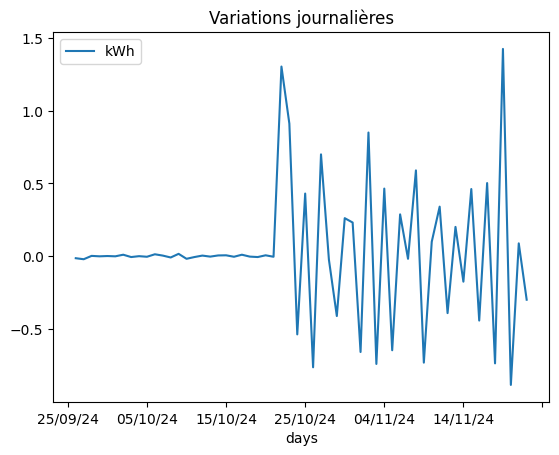

In [1519]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [1520]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:50.117155,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:11.975155,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:33.976155,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:05:55.904155,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:17.795155,21/08/23,19
...,...,...,...,...,...,...,...,...
1605521,28482,0.13,28.482,126.395618,39712284242,2024-11-23 10:15:52.425155,23/11/24,10
1605522,29041,0.12,29.041,123.962673,39712313283,2024-11-23 10:16:21.466155,23/11/24,10
1605523,28935,0.12,28.935,124.416796,39712342218,2024-11-23 10:16:50.401155,23/11/24,10
1605524,28737,0.12,28.737,125.274037,39712370955,2024-11-23 10:17:19.138155,23/11/24,10


In [1521]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [1522]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [1523]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [1524]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1525]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,836
22/08/23,3701
23/08/23,4231
24/08/23,3682
25/08/23,4190
...,...
19/11/24,4572
20/11/24,3688
21/11/24,3776


In [1526]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:04:50.117155,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:05:11.975155,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:05:33.976155,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:05:55.904155,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:06:17.795155,21/08/23,19
...,...,...,...,...,...,...,...,...
1605521,28482,0.13,28.482,126.395618,39712284242,2024-11-23 10:15:52.425155,23/11/24,10
1605522,29041,0.12,29.041,123.962673,39712313283,2024-11-23 10:16:21.466155,23/11/24,10
1605523,28935,0.12,28.935,124.416796,39712342218,2024-11-23 10:16:50.401155,23/11/24,10
1605524,28737,0.12,28.737,125.274037,39712370955,2024-11-23 10:17:19.138155,23/11/24,10


In [1527]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
23/11/24 10    1605521  23/11/24    10  0.13
               1605522  23/11/24    10  0.12
               1605523  23/11/24    10  0.12
               1605524  23/11/24    10  0.12
               1605525  23/11/24    10  0.12

[1605526 rows x 3 columns]

In [1528]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [1529]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [1530]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,836,836
22/08/23,3701,3701
23/08/23,4231,4231
24/08/23,3682,3682
25/08/23,4190,4190
...,...,...
19/11/24,4572,4572
20/11/24,3688,3688
21/11/24,3776,3776


In [1531]:
grp_by_day['kWh'].cumsum()

days
21/08/23        836
22/08/23       4537
23/08/23       8768
24/08/23      12450
25/08/23      16640
             ...   
19/11/24    1593327
20/11/24    1597015
21/11/24    1600791
22/11/24    1604268
23/11/24    1605526
Name: kWh, Length: 461, dtype: int64

In [1532]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     163
         20     283
         21     130
         22     130
         23     130
...             ...
23/11/24 06     109
         07     110
         08     114
         09     184
         10      37

[11032 rows x 1 columns]

In [1533]:
grp_by_dayhours['kWh'].cumsum()

C:\Users\jean\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


days      hours
21/08/23  19           163
          20           446
          21           576
          22           706
          23           836
                    ...   
23/11/24  06       1605081
          07       1605191
          08       1605305
          09       1605489
          10       1605526
Name: kWh, Length: 11032, dtype: int64

In [1534]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     163     163    NaN
         20     283     446  120.0
         21     130     576 -153.0
         22     130     706    0.0
         23     130     836    0.0
...             ...     ...    ...
23/11/24 06     109     813   -2.0
         07     110     923    1.0
         08     114    1037    4.0
         09     184    1221   70.0
         10      37    1258 -147.0

[11032 rows x 3 columns]

In [1535]:
today, grp_by_dayhours.loc[today]

('23/11/24',
        kWh  cumsum   diff
 hours                    
 00     125     125    NaN
 01     132     257    7.0
 02     116     373  -16.0
 03     109     482   -7.0
 04     111     593    2.0
 05     111     704    0.0
 06     109     813   -2.0
 07     110     923    1.0
 08     114    1037    4.0
 09     184    1221   70.0
 10      37    1258 -147.0)

Text(0.5, 1.0, 'Cumul journalier')

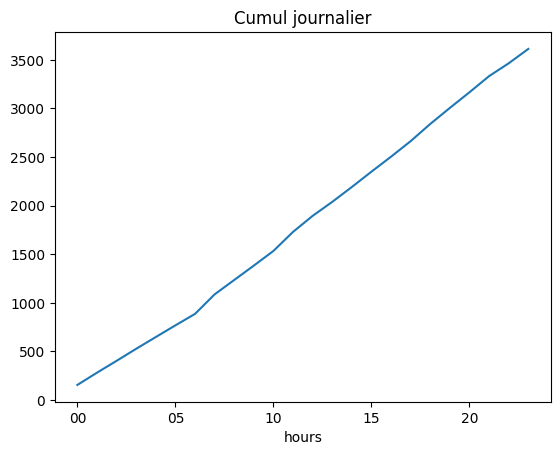

In [1536]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

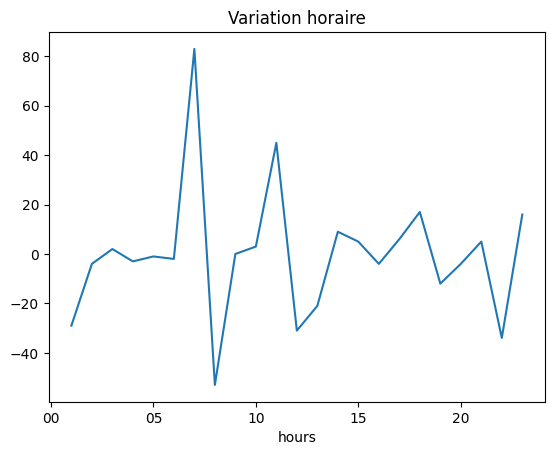

In [1537]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [1538]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

461

In [1539]:
df_grp.tail(n)['kWh'].describe()


count    461.000000
mean       3.482703
std        0.710730
min        0.836000
25%        3.342000
50%        3.616000
75%        3.875000
max        5.129000
Name: kWh, dtype: float64

In [1540]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '461 days')

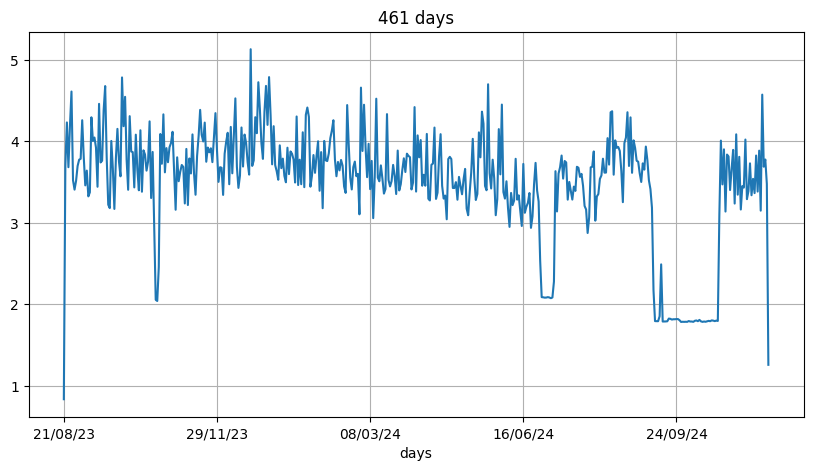

In [1541]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

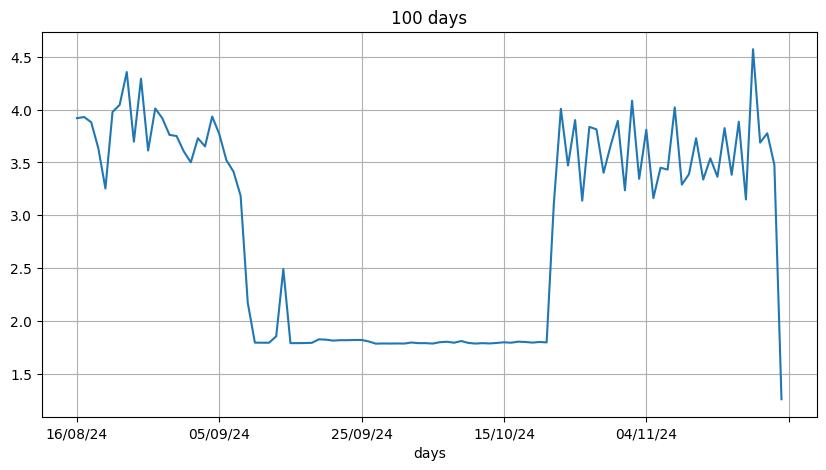

In [1542]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1543]:
df_grp['kWh']

days
21/08/23    0.836
22/08/23    3.701
23/08/23    4.231
24/08/23    3.682
25/08/23    4.190
            ...  
19/11/24    4.572
20/11/24    3.688
21/11/24    3.776
22/11/24    3.477
23/11/24    1.258
Name: kWh, Length: 461, dtype: float64

In [1544]:
df_grp.describe()

,kWh
count,461.000000
mean,3.482703
std,0.710730
min,0.836000
25%,3.342000
50%,3.616000
75%,3.875000
max,5.129000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

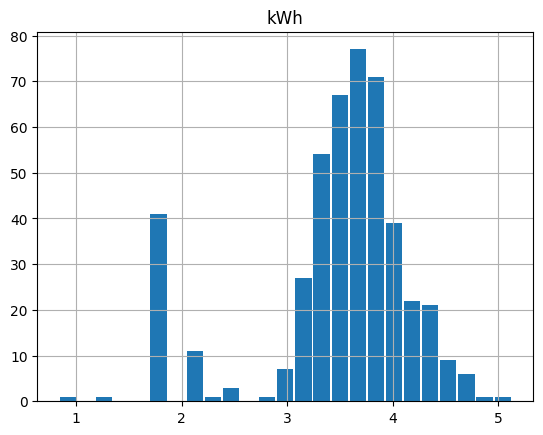

In [1545]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [1546]:
df_grp.tail(span)['kWh']

days
16/08/24    3.919
17/08/24    3.930
18/08/24    3.881
19/08/24    3.635
20/08/24    3.253
            ...  
19/11/24    4.572
20/11/24    3.688
21/11/24    3.776
22/11/24    3.477
23/11/24    1.258
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [1547]:
day

'23/11/24'

In [1548]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,125,125,NaN
01,132,257,7.0
02,116,373,-16.0
03,109,482,-7.0
04,111,593,2.0
05,111,704,0.0
06,109,813,-2.0
07,110,923,1.0
08,114,1037,4.0


In [1549]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


11

In [1550]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 12)

In [1551]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [1552]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [1553]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [1554]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [1555]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 00 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     11 non-null     int64  
 1   cumsum  11 non-null     int64  
 2   diff    10 non-null     float64
 3   days    11 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 440.0+ bytes


In [1556]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [1557]:
day

'23/11/24'

In [1558]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,125,125,NaN,1.0
01,132,257,7.0,2.0
02,116,373,-16.0,3.0
03,109,482,-7.0,4.0
04,111,593,2.0,5.0
05,111,704,0.0,6.0
06,109,813,-2.0,7.0
07,110,923,1.0,8.0
08,114,1037,4.0,9.0


Text(0.5, 1.0, '23/11/24')

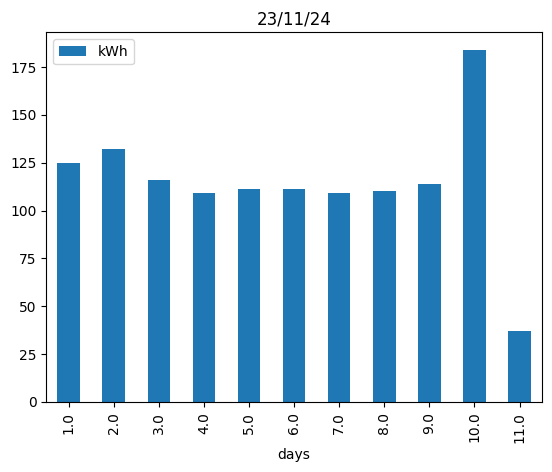

In [1559]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [1560]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object', name='hours')

# Conso du jour


In [1561]:
groupedbyhour.count()

,kWh
hours,
00,125
01,132
02,116
03,109
04,111
05,111
06,109
07,110
08,114


In [1562]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    167
01    152
02    169
03    166
04    146
05    136
06    119
07    126
08    131
09    114
10    130
11    126
12    175
13    156
14    138
15    156
16    987
17    229
18    294
19    290
20    317
21    326
22    200
23    179
Name: kWh, dtype: int64

In [1563]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

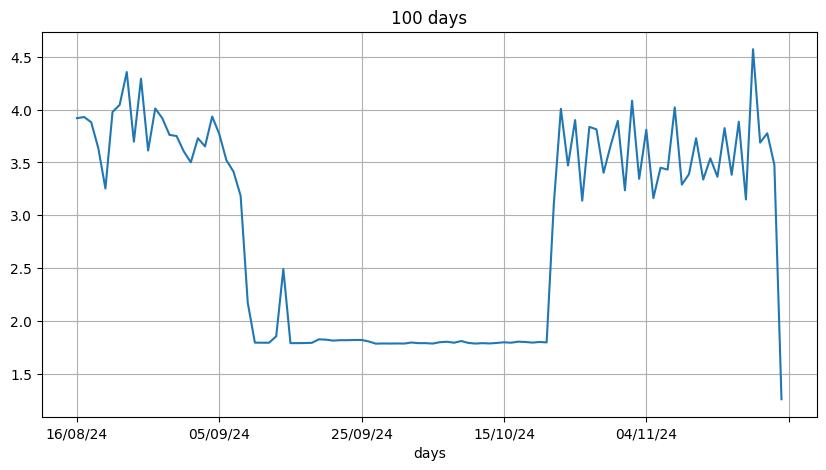

In [1564]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1565]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

98.88929915428162


# Today

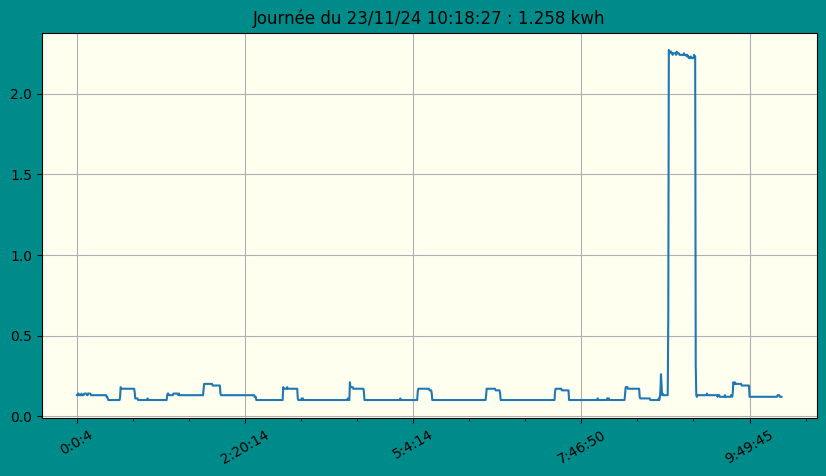

In [1566]:
show(today,bgcolor='ivory')

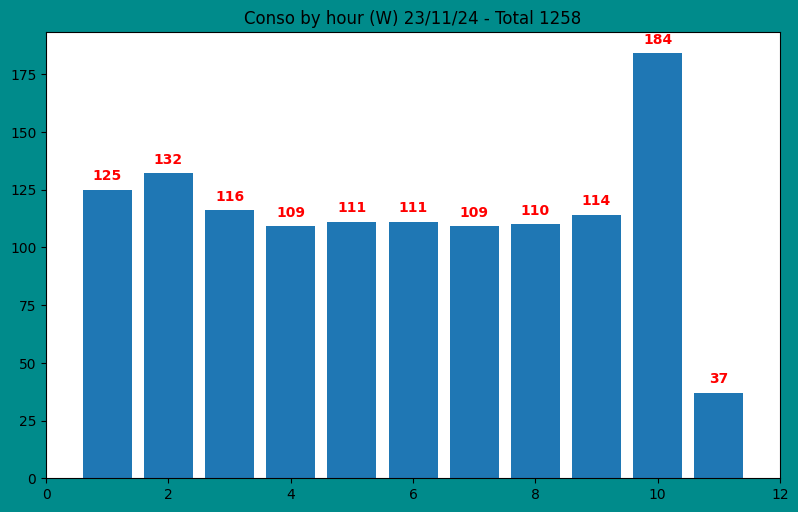

In [1567]:
conso_by_hour(today)

In [1568]:
day = '21/11/24'

('21/11/24', None)

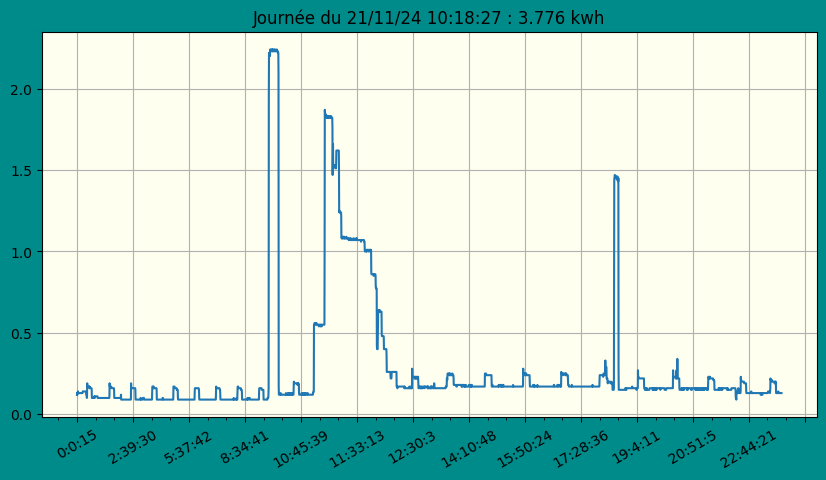

In [1569]:
day, show(day,bgcolor='ivory')

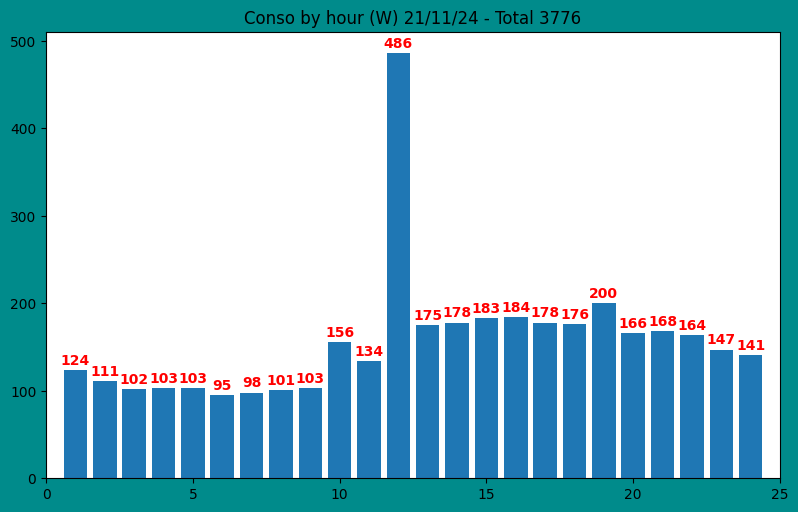

In [1570]:
conso_by_hour(day)

('21/12/23', None)

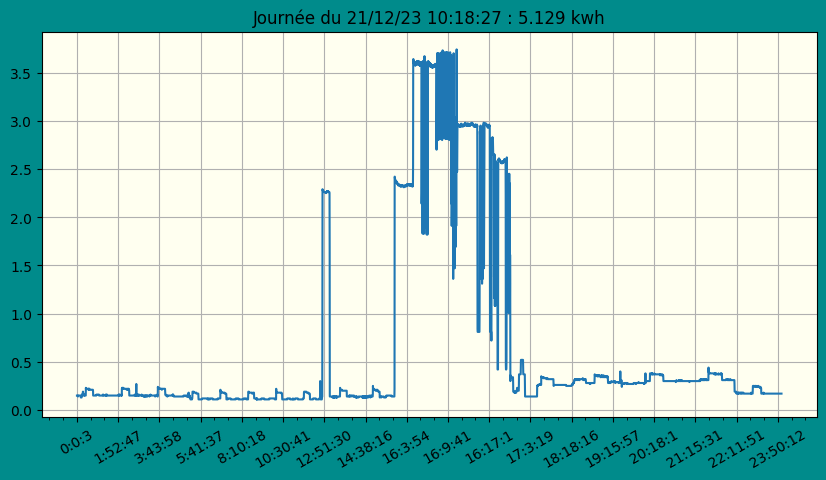

In [1571]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

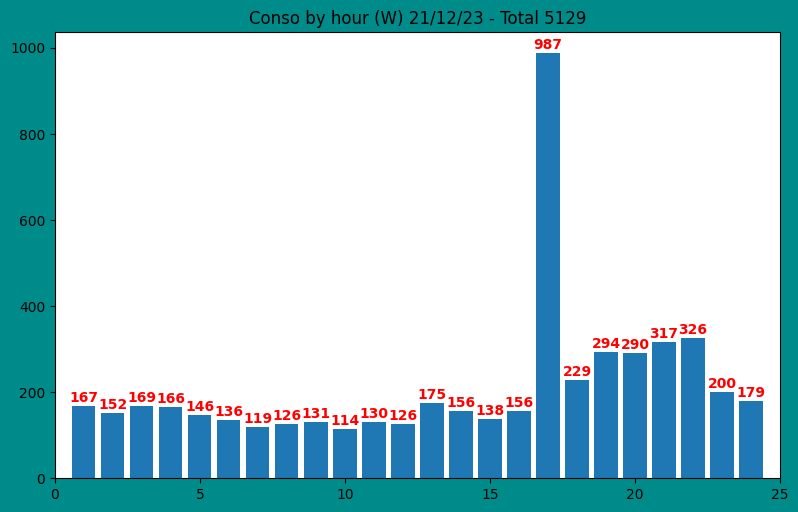

In [1572]:
conso_by_hour(day)

In [1573]:
sum(data)

5129

In [1574]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,125,125,NaN,1.0
01,132,257,7.0,2.0
02,116,373,-16.0,3.0
03,109,482,-7.0,4.0
04,111,593,2.0,5.0
05,111,704,0.0,6.0
06,109,813,-2.0,7.0
07,110,923,1.0,8.0
08,114,1037,4.0,9.0


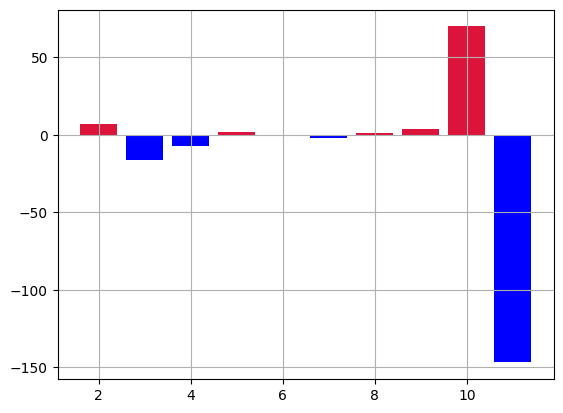

In [1575]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [1576]:
data

hours
00    167
01    152
02    169
03    166
04    146
05    136
06    119
07    126
08    131
09    114
10    130
11    126
12    175
13    156
14    138
15    156
16    987
17    229
18    294
19    290
20    317
21    326
22    200
23    179
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

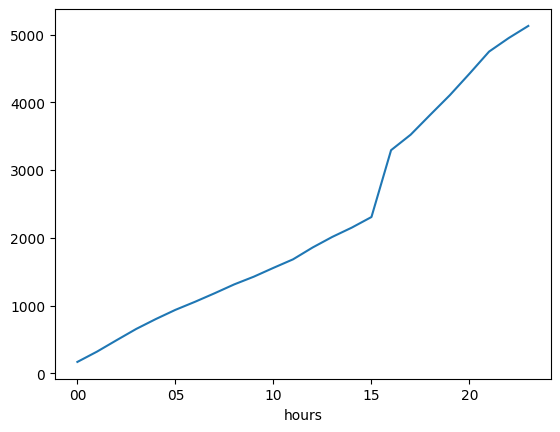

In [1577]:
data.cumsum().plot()


<Axes: xlabel='hours'>

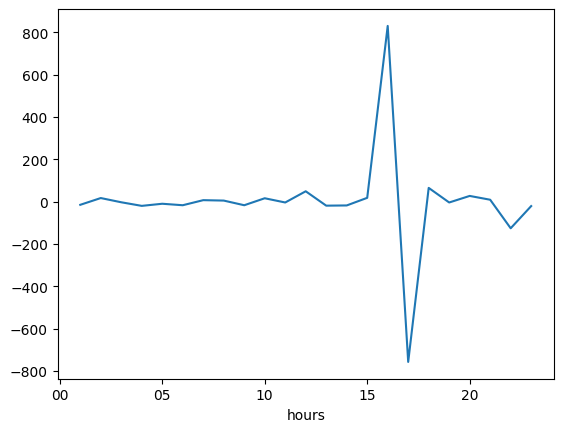

In [1578]:
# evolution par heure
data.diff().plot()

In [1579]:
data.diff().describe()

count     23.000000
mean       0.521739
std      242.322450
min     -758.000000
25%      -17.500000
50%       -4.000000
75%       16.500000
max      831.000000
Name: kWh, dtype: float64

<Axes: >

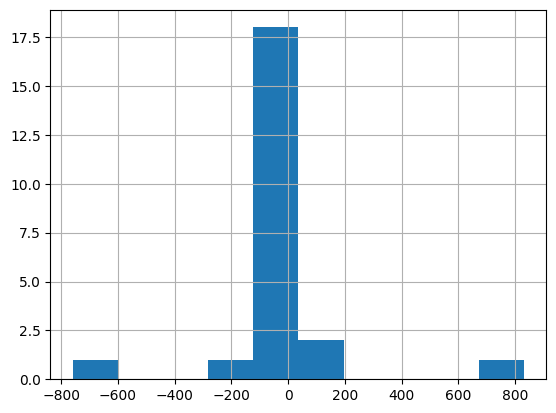

In [1580]:
data.diff().hist()

# Test sauvegarde

In [1581]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [1582]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1583]:
#conso_byhour(day)

In [1584]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


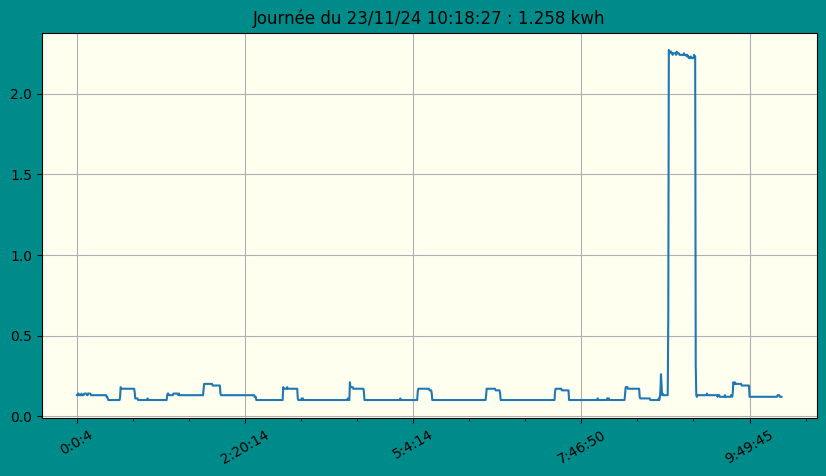

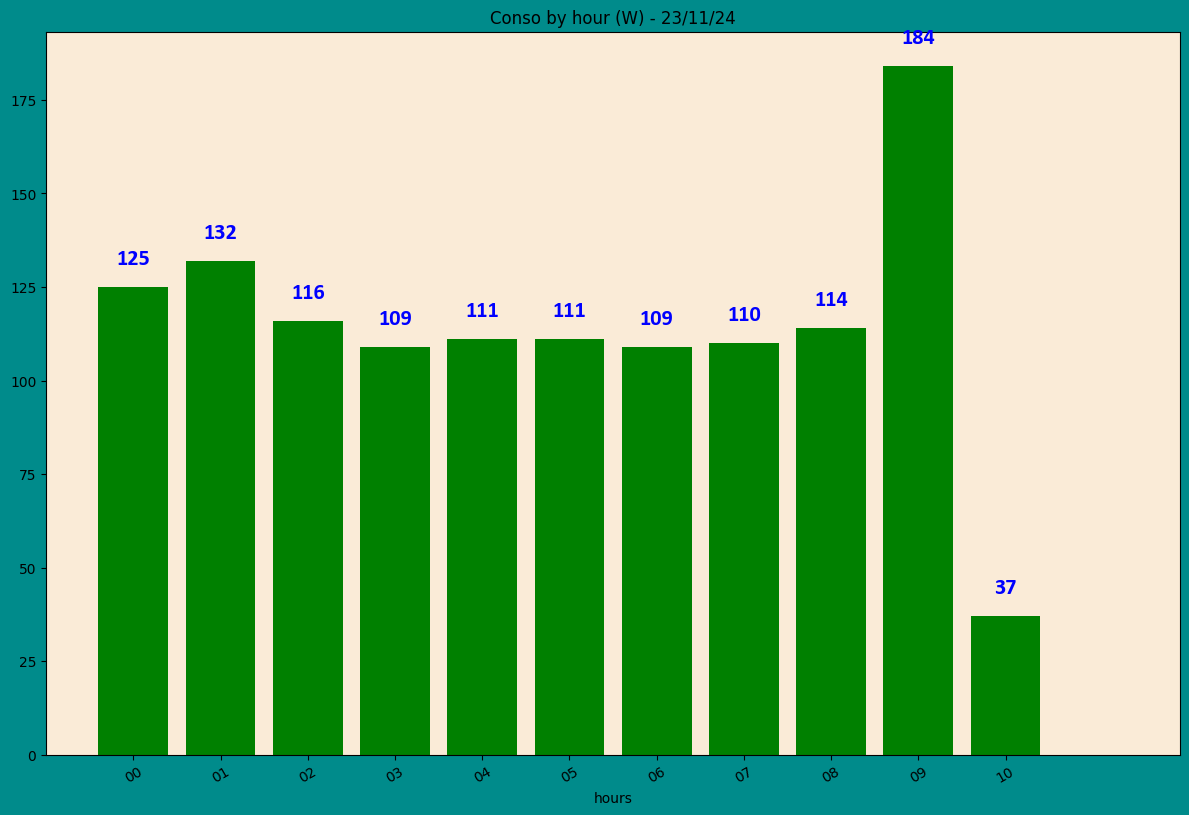

In [1585]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1586]:
month.describe()


count    30.000000
mean      3.602133
std       0.327654
min       3.138000
25%       3.368750
50%       3.508000
75%       3.822000
max       4.572000
Name: kWh, dtype: float64

<Axes: >

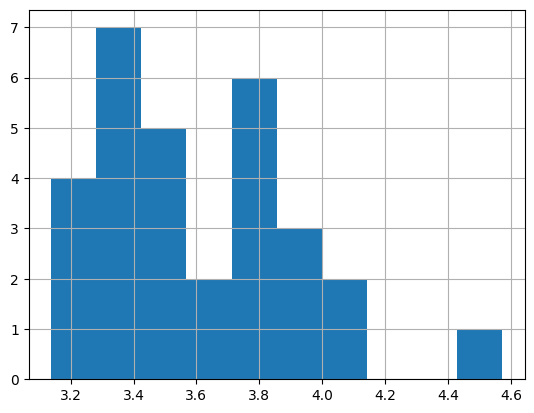

In [1587]:
month.hist()

<Axes: xlabel='days'>

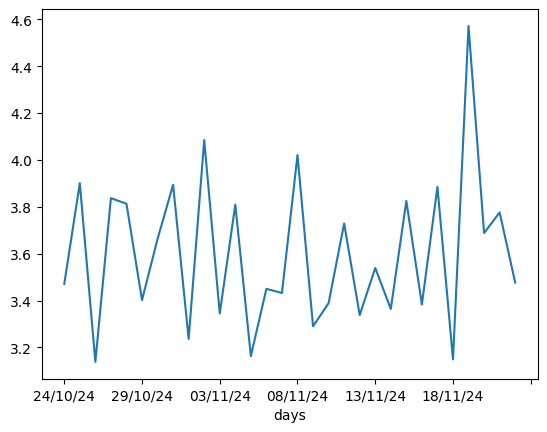

In [1588]:
month.plot()

In [1589]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [1590]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

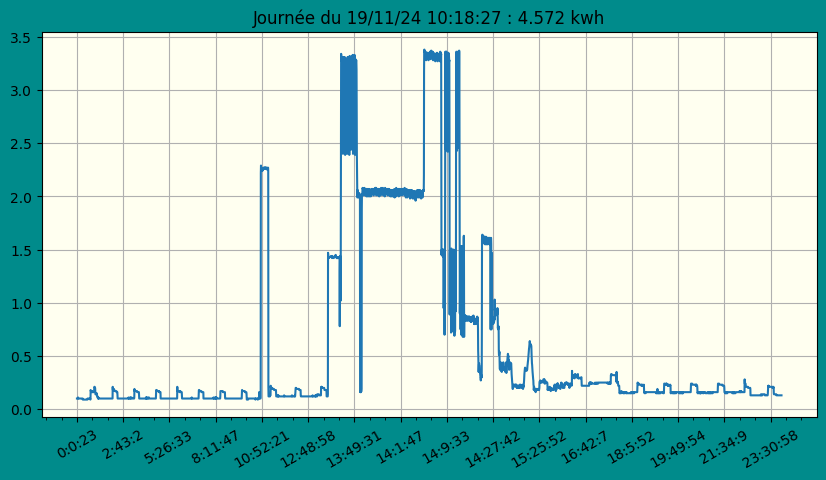

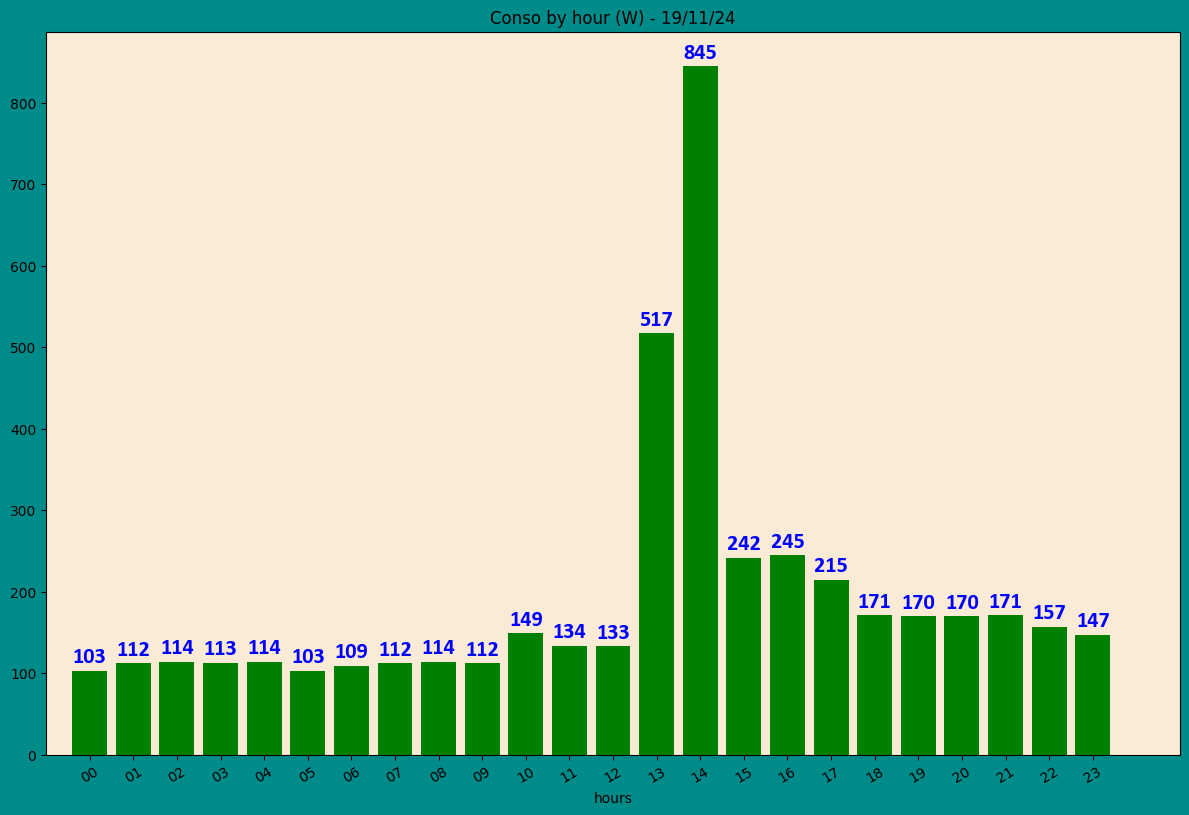

In [1591]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1592]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19     163     163    NaN   NaN
         20     283     446  120.0   NaN
         21     130     576 -153.0   NaN
         22     130     706    0.0   NaN
         23     130     836    0.0   NaN
...             ...     ...    ...   ...
23/11/24 06     109     813   -2.0   7.0
         07     110     923    1.0   8.0
         08     114    1037    4.0   9.0
         09     184    1221   70.0  10.0
         10      37    1258 -147.0  11.0

[11032 rows x 4 columns]

In [1593]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,103,103,NaN,NaN
01,112,215,9.0,NaN
02,114,329,2.0,NaN
03,113,442,-1.0,NaN
04,114,556,1.0,NaN
05,103,659,-11.0,NaN
06,109,768,6.0,NaN
07,112,880,3.0,NaN
08,114,994,2.0,NaN


In [1594]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

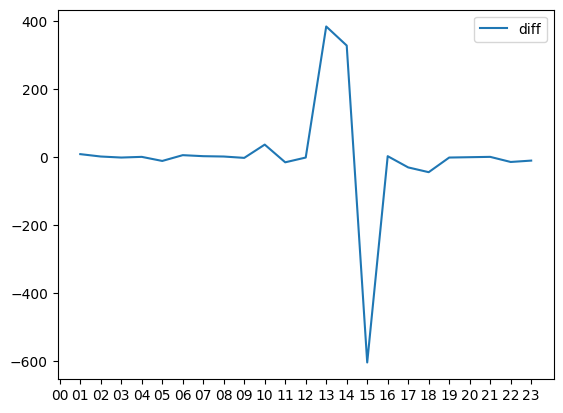

In [1595]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

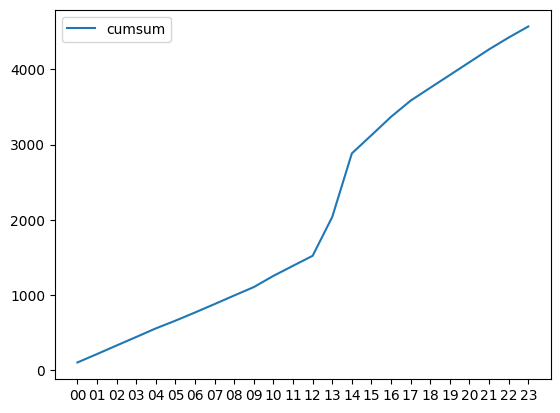

In [1596]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [1597]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB